### Laboratorium 8
# Rozwiązywanie równań nieliniowych

Sebastian Soczawa, Piotr Kuchta

## Zadanie 1

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import sin, cos

In [229]:
def f(x):
    return x*x -3*x + 2

Powyższa funkcja posiada 2 pierwiastki: $ x = 2 $, oraz $ x = 1 $

Poniżej definiujemy schematy iteracyjne podane w zadaniu 1.

In [230]:
def g1(x):
    return (x**2 + 2) / 3

def g2(x):
    return (3*x - 2)**(1/2)

def g3(x):
    return 3 - 2/x

def g4(x):
    return (x**2 - 2)/(2*x - 3)

# derivatives

def g1_der(x):
    return 2*x/3

def g2_der(x):
    return 3/(2*(3*x - 2)**(1/2))

def g3_der(x):
    return 2/(x**2)

def g4_der(x):
    return 2*(x**2 -3*x + 2)/((2*x - 3)**2)

In [231]:
# g`(2)
print("|g1`(2)| = ", round(abs(g1_der(2)),2))
print("|g2`(2)| = ", abs(g2_der(2)))
print("|g3`(2)| = ", abs(g3_der(2)))
print("|g4`(2)| = ", abs(g4_der(2)))

|g1`(2)| =  1.33
|g2`(2)| =  0.75
|g3`(2)| =  0.5
|g4`(2)| =  0.0


Pochodne funkcji $g_2, g_3$ oraz $g_4$ w punkcie x = 2 są w wartości bezwzględnej mniejsze od 1, więc z twierdzenia o zbieżności procesu iteracyjnego możemy stwierdzić, że są one zbieżne do pierwiastka x = 2. Im mniejsza wartość $ |g_i`(2)| $ tym wwyższy rząd zbieżności. W przypadku funkcji $g_4$ rząd ten wynosi conajmniej 2, ponieważ $ |g_4`(2)|= 0$. 
Schemat iteraycjny $x = g_1(x)$ jest rozbieżny, gdyż $ | g_1`(2) | $ > 1

b) funkcja realizująca schemat iteracyjny i obliczająca błędy w każdej iteracji

In [232]:
def iterate(x, abs_err, g, x0, root):
    x[0] = x0;
    abs_err[0] = abs(root - x0) 
    for i in range(1, 10):
        x[i] = g(x[i-1])
        abs_err[i] = abs(root - x[i])

funkcja obliczająca rząd zbieżności, zgodnie ze wzorem podanym w zadaniu: $$ r = \frac{ln \frac{\epsilon _k}{\epsilon _{k+1}}}{ln \frac{\epsilon _{k-1}}{\epsilon _k}} $$

In [233]:
def calc_convergence(err, rate):
    for i in range(1, 9):
        rate[i] = np.log(err[i] / err[i+1]) / np.log(err[i-1] / err[i]) 

In [234]:
x0 = 1.9
root = 2
x_1 = np.array([0 for _ in range(10)], dtype=float)
x_2 = np.array([0 for _ in range(10)], dtype=float)
x_3 = np.array([0 for _ in range(10)], dtype=float)
x_4 = np.array([0 for _ in range(10)], dtype=float)

err_1 = np.array([0 for _ in range(10)], dtype=float)
err_2 = np.array([0 for _ in range(10)], dtype=float)
err_3 = np.array([0 for _ in range(10)], dtype=float)
err_4 = np.array([0 for _ in range(10)], dtype=float)

r_1 = np.array([0 for _ in range(10)], dtype=float)
r_2 = np.array([0 for _ in range(10)], dtype=float)
r_3 = np.array([0 for _ in range(10)], dtype=float)
r_4 = np.array([0 for _ in range(10)], dtype=float)


iterate(x_1, err_1, g1, x0, root)
iterate(x_2, err_2, g2, x0, root)
iterate(x_3, err_3, g3, x0, root)
iterate(x_4, err_4, g4, x0, root)

calc_convergence(err_1, r_1)
calc_convergence(err_2, r_2)
calc_convergence(err_3, r_3)
calc_convergence(err_4, r_4)

/tmp/ipykernel_157381/3467930521.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  rate[i] = np.log(err[i] / err[i+1]) / np.log(err[i-1] / err[i])
/tmp/ipykernel_157381/3467930521.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rate[i] = np.log(err[i] / err[i+1]) / np.log(err[i-1] / err[i])


In [235]:
print(r_1)
print(r_2)
print(r_3)
print(r_4)
print("Przybliżenia g1", x_1)
print("Przybliżenia g2",x_2)
print("Przybliżenia g3",x_3)
print("Przybliżenia g4",x_4)
print("Błąd g1", err_1)
print("Błąd g2", err_2)
print("Błąd g3", err_3)
print("Błąd g4", err_4)

[0.         0.97056746 0.96155641 0.95011423 0.93581246 0.91829978
 0.89741381 0.87332076 0.84664403 0.        ]
[0.         1.01730893 1.01304221 1.00981567 1.00738088 1.00554641
 1.00416586 1.00312779 1.00234775 0.        ]
[0.         1.0383655  1.01959941 1.00990782 1.00498145 1.00249768
 1.00125059 1.00062573 1.00031298 0.        ]
[0.         2.119184   1.99446577 1.94327727        inf        nan
        nan        nan        nan 0.        ]
Przybliżenia g1 [1.9        1.87       1.8323     1.78577443 1.72966344 1.66391187
 1.58953424 1.50887303 1.42556594 1.34407942]
Przybliżenia g2 [1.9        1.92353841 1.9418072  1.95586851 1.96662287 1.9748085
 1.98101628 1.98571117 1.98925451 1.99192458]
Przybliżenia g3 [1.9        1.94736842 1.97297297 1.98630137 1.99310345 1.99653979
 1.9982669  1.9991327  1.99956616 1.99978303]
Przybliżenia g4 [1.9        2.0125     2.00015244 2.00000002 2.         2.
 2.         2.         2.         2.        ]
Błąd g1 [0.1        0.13       0.1677    

In [236]:
for i in range(10):
    err_1 = err_1/root
    err_2 = err_2/root
    err_3 = err_3/root
    err_4 = err_4/root

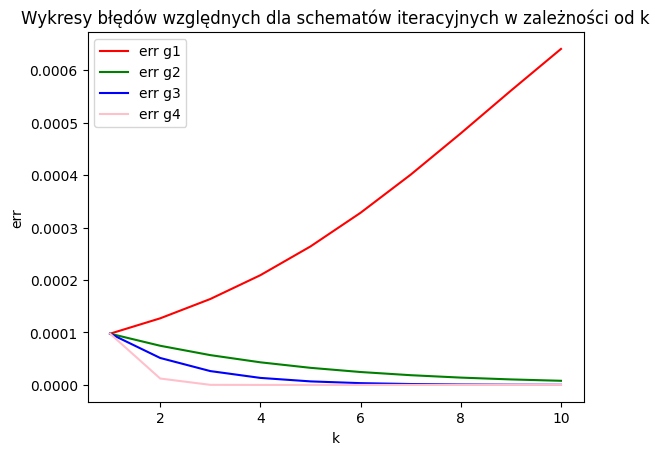

In [237]:
k_space = [i for i in range(1, 11)]

plt.title("Wykresy błędów względnych dla schematów iteracyjnych w zależności od k")
plt.xlabel("k")
plt.ylabel("err")
plt.plot(k_space, err_1, color='r', label="err g1")
plt.plot(k_space, err_2, color='g', label="err g2")
plt.plot(k_space, err_3, color='b', label="err g3")
plt.plot(k_space, err_4, color='pink', label="err g4")
plt.legend()
plt.show()

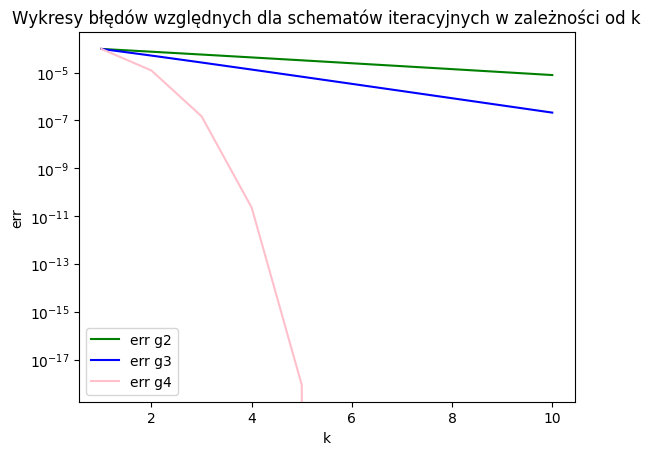

In [238]:
plt.semilogy()
plt.title("Wykresy błędów względnych dla schematów iteracyjnych w zależności od k")
plt.xlabel("k")
plt.ylabel("err")
plt.plot(k_space, err_2, color='g', label="err g2")
plt.plot(k_space, err_3, color='b', label="err g3")
plt.plot(k_space, err_4, color='pink', label="err g4")
plt.legend()
plt.show()

### Wnioski

Błąd generowany przez metodę znacząco zależy od tego jaki schemat iteracyjny wybierzemy. Po pierwsze powinno się go dobrać, tak żeby był zbieżny, po drugie żeby rząd tej zbieżności był jak największy. 

## Zadanie 2

Poniższa funkcja oblicza przyliżone rozwiązania równania nieliniowego metodą N-R, zgodnie ze schematem iteracji:

$$ x_{k+1} = x_k - \frac{f(x_{k})}{f`(x_{k})} $$

In [239]:
def NewtonRaphson(f, f_der, x0, bit_prec):
    x_prev = float(np.inf)
    x = x0
    i = 0
    while(abs(x_prev - x) > 2**(-bit_prec) and i < 8):
        i += 1
        x_prev = x
        x = x - f(x)/f_der(x)
        print("iteracja", i, ":", x)
    return i

In [240]:
def f_a(x):
    return x**3 - 2*x - 5

def f_a_der(x):
    return 3*x**2 - 2

def f_b(x):
    return np.e**(-x) - x

def f_b_der(x):
    return -np.e**(-x) - 1

def f_c(x):
    return x*np.sin(x) - 1

def f_c_der(x):
    return x*np.cos(x) + np.sin(x)

In [241]:
print("a: pojedyncza precyzja -  ", NewtonRaphson(f_a, f_a_der, 2.125, 24))
print("a: podwójna precycja - ", NewtonRaphson(f_a, f_a_der, 2.125, 53))
print()
print("b: pojedyncza precyzja - ", NewtonRaphson(f_b, f_b_der, 0.5625, 24))
print("b: podwójna precycja - ", NewtonRaphson(f_b, f_b_der, 0.5625, 53))
print()
print("c: pojedyncza precyzja - ", NewtonRaphson(f_c, f_c_der, 1.125, 24))
print("c: podwójna precyzja - ", NewtonRaphson(f_c, f_c_der, 1.125, 53))

iteracja 1 : 2.095060893098782
iteracja 2 : 2.0945516275753544
iteracja 3 : 2.0945514815423385
iteracja 4 : 2.0945514815423265
a: pojedyncza precyzja -   4
iteracja 1 : 2.095060893098782
iteracja 2 : 2.0945516275753544
iteracja 3 : 2.0945514815423385
iteracja 4 : 2.0945514815423265
iteracja 5 : 2.0945514815423265
a: podwójna precycja -  5

iteracja 1 : 0.5671393836244013
iteracja 2 : 0.567143290407022
iteracja 3 : 0.5671432904097838
b: pojedyncza precyzja -  3
iteracja 1 : 0.5671393836244013
iteracja 2 : 0.567143290407022
iteracja 3 : 0.5671432904097838
iteracja 4 : 0.567143290409784
b: podwójna precycja -  4

iteracja 1 : 1.114151159334629
iteracja 2 : 1.1141571408704085
iteracja 3 : 1.11415714087193
c: pojedyncza precyzja -  3
iteracja 1 : 1.114151159334629
iteracja 2 : 1.1141571408704085
iteracja 3 : 1.11415714087193
iteracja 4 : 1.1141571408719302
iteracja 5 : 1.11415714087193
iteracja 6 : 1.1141571408719302
iteracja 7 : 1.11415714087193
iteracja 8 : 1.1141571408719302
c: podwójna 

Rząd zbieżności metody Newtona-Raphsona wynosi r = 2, co oznacza, że z każdą iteracją powinniśmy uzyskać wynik dwukrotnie lepszy. Więc jeśli x_0 jest przybliżeniem z dokładnością do 4 bitów, to aby uzyskać dokładność 24 bitów musimy wykonać 3 iteracje, natomiast dla podwójnej precyzji 53 bitów wystarczą 4 iteracje.

iteracja 1 : 2.095060893098782  
iteracja 2 : 2.0945516275753544  
iteracja 3 : 2.0945514815423385  
iteracja 4 : 2.0945514815423265  
a: pojedyncza precyzja -   4  
iteracja 1 : 2.095060893098782  
iteracja 2 : 2.0945516275753544  
iteracja 3 : 2.0945514815423385  
iteracja 4 : 2.0945514815423265  
iteracja 5 : 2.0945514815423265  
a: podwójna precycja -  5  

W przykładzie a) obie zarówno dokładność 24 jak i 53 bitów otrzymujemu po 4 iteracjach
  
iteracja 1 : 0.5671393836244013  
iteracja 2 : 0.567143290407022  
iteracja 3 : 0.5671432904097838  
b: pojedyncza precyzja -  3  
iteracja 1 : 0.5671393836244013  
iteracja 2 : 0.567143290407022  
iteracja 3 : 0.5671432904097838  
iteracja 4 : 0.567143290409784  
b: podwójna precycja -  4  

w przykładzie wszystko zgadza się z przewidywaniami
  
iteracja 1 : 1.114151159334629  
iteracja 2 : 1.1141571408704085  
iteracja 3 : 1.11415714087193  
c: pojedyncza precyzja -  3  
iteracja 1 : 1.114151159334629  
iteracja 2 : 1.1141571408704085  
iteracja 3 : 1.11415714087193  
iteracja 4 : 1.1141571408719302  
iteracja 5 : 1.11415714087193  
iteracja 6 : 1.1141571408719302  
iteracja 7 : 1.11415714087193  
iteracja 8 : 1.1141571408719302  
c: podwójna precyzja -  8  

w przykładzie c obie dokładności otrzymujemy po 3 iteracjach

### Wnioski

Metoda Newtona-Raphsona już po kilku iteracjach daje nam bardzo dobre przybliżenie szukanego pierwiastka. 

## Zadanie 3

Napisz  schemat  iteracji  wg  metody  Newtona  dla  następującego układu równań nieliniowych:
$$ x_1^2+x_2^2= 1, 
x_1^2−x_2= 0 $$

Tworzymy układ równań

In [242]:
def F(x1, x2):
    return np.array([x1**2 + x2**2 - 1, x1**2 - x2])

Na podstawie informacji podanych w literaturze, tworzymy macierz jakobiego:

In [243]:
def jacobian(x1, x2):
    return np.array([[2*x1, 2*x2], [2*x1, -1]])

Definiujemy funkcję odpowiedzialną za rozwiązanie iteracyjne rozwiązanie układu metodą N-R

In [244]:
def solve_nonlinear_system(X0, eps, iter):
    X = X0
    for _ in range(iter):
        J = jacobian(X[0], X[1])
        F_X = F(X[0], X[1])
        S = np.linalg.solve(J, -F_X)
        X = X + S
        if np.linalg.norm(S) < eps:
            break
    return X

In [245]:
newton_sol = solve_nonlinear_system(np.array([-1.0, 1.0]), 1e-10, 100)
exact_sol = np.array([-np.sqrt((np.sqrt(5)/2)-1/2), np.sqrt(5)/2 - 1/2])

err = np.linalg.norm(newton_sol-exact_sol)/np.linalg.norm(exact_sol)

print("Przybliżenie: ", newton_sol)
print("Wartość prawdziwa: ", exact_sol)
print("Błąd względny: ", err)

Przybliżenie:  [-0.78615138  0.61803399]
Wartość prawdziwa:  [-0.78615138  0.61803399]
Błąd względny:  1.1102230246251565e-16


### Wnioski

Błąd względny metody jest niemalże zerowy, co pokazuje, że rozwiązywanie układów równań nieliniowych za pomocą metody Newtona-Raphsona jest bardzo dokładne.

## Literatura:

- https://heath.cs.illinois.edu/scicomp/notes/cs450_chapt05.pdf